# problem -1
Build a Transfer Image Classification model using the VGG16 & VGG19 (pre-trained network).

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=[224,224]

train_path='C:/Users/Sravan Kumar/Downloads/dataset/train'
valid_path='C:/Users/Sravan Kumar/Downloads/dataset/test'

In [3]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

for layer in vgg16.layers:
    layer.trainable=False

58889256/58889256 [==============================] - 23s 0us/step


In [8]:
folders=glob('C:/Users/Sravan Kumar/Downloads/dataset/train/*')

In [9]:
folders

['C:/Users/Sravan Kumar/Downloads/dataset/train\\African',
 'C:/Users/Sravan Kumar/Downloads/dataset/train\\Asian']

In [11]:
len(folders)

2

In [13]:
x=Flatten()(vgg16.output)

prediction=Dense(len(folders),activation='softmax')(x)

In [15]:
model=Model(inputs=vgg16.input,outputs=prediction)
print(model.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Training length:\n')
training_set = train_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print('=' * 100)
print('Test length:\n')
test_set = test_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Training length:

Found 840 images belonging to 2 classes.
Test length:

Found 188 images belonging to 2 classes.


In [21]:
r=model.fit(training_set,
            validation_data=test_set,
            epochs=15,
            steps_per_epoch=len(training_set),
            validation_steps=len(test_set))

Epoch 1/15
27/27 [==============================] - 275s 10s/step - loss: 0.9806 - accuracy: 0.5595 - val_loss: 0.4841 - val_accuracy: 0.7819
Epoch 2/15
27/27 [==============================] - 291s 11s/step - loss: 0.5757 - accuracy: 0.7012 - val_loss: 0.5063 - val_accuracy: 0.7287
Epoch 3/15
27/27 [==============================] - 277s 10s/step - loss: 0.4924 - accuracy: 0.7679 - val_loss: 0.3980 - val_accuracy: 0.8404
Epoch 4/15
27/27 [==============================] - 258s 10s/step - loss: 0.4916 - accuracy: 0.7726 - val_loss: 0.5827 - val_accuracy: 0.6915
Epoch 5/15
27/27 [==============================] - 257s 10s/step - loss: 0.4664 - accuracy: 0.7619 - val_loss: 0.4143 - val_accuracy: 0.8032
Epoch 6/15
27/27 [==============================] - 257s 10s/step - loss: 0.3799 - accuracy: 0.8274 - val_loss: 0.3382 - val_accuracy: 0.8617
Epoch 7/15
27/27 [==============================] - 259s 10s/step - loss: 0.4017 - accuracy: 0.8155 - val_loss: 0.3400 - val_accuracy: 0.8723
Epoch 

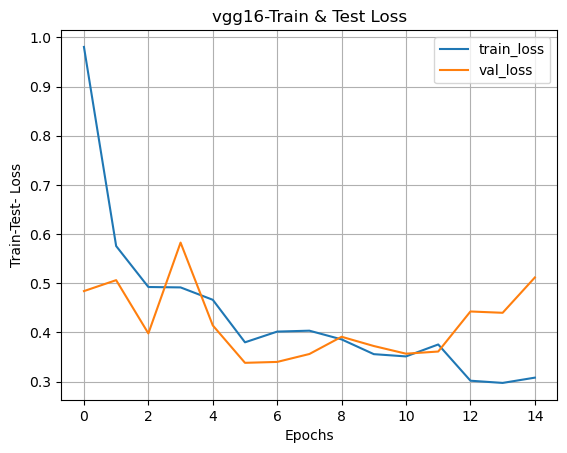

<Figure size 640x480 with 0 Axes>

In [22]:
plt.title('vgg16-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Loss & Val_loss')

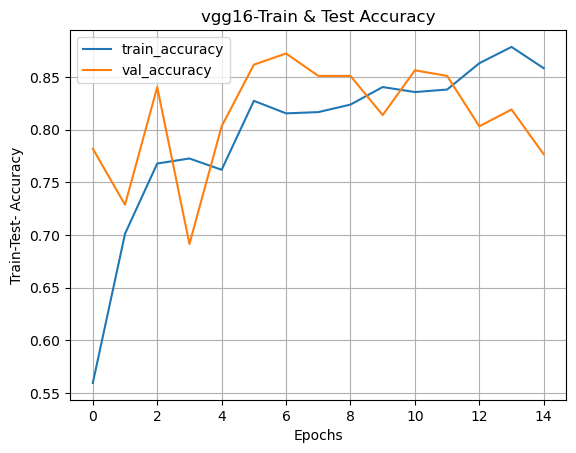

<Figure size 640x480 with 0 Axes>

In [23]:
plt.title('vgg16-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg16--Accuracy & Val_accuracy')

In [24]:
import tensorflow as tf
from keras.models import load_model
model.save('VGG16_classify.h5')

C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model.save('VGG16_classify.keras')

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['African','Asian']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

6/6 [==============================] - 48s 8s/step
Confusion Matrix
[[29 68]
 [28 63]]
Classification Report
              precision    recall  f1-score   support

     African       0.51      0.30      0.38        97
       Asian       0.48      0.69      0.57        91

    accuracy                           0.49       188
   macro avg       0.49      0.50      0.47       188
weighted avg       0.50      0.49      0.47       188

Accuracy Score
0.48936170212765956


<Axes: >

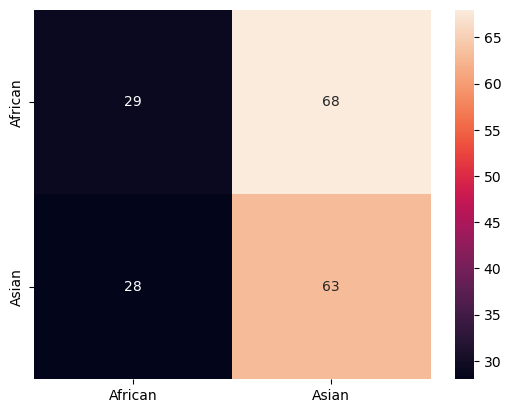

In [29]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['African','Asian'],
            yticklabels=['African','Asian'])

# Problem-2
Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications import InceptionV3
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train'
valid_path = 'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_test/seg_test'

In [4]:
inceptionv3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in inceptionv3.layers:
    layer.trainable = False

In [5]:
folders = glob('C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train/*')

In [6]:
folders

['C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train\\buildings',
 'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train\\forest',
 'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train\\mountain',
 'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train\\sea']

In [7]:
x = Flatten()(inceptionv3.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=inceptionv3.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [11]:
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Training length:\n')
training_set = train_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print('=' * 100)

print('Test length:\n')
test_set = test_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_test/seg_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Training length:

Found 9248 images belonging to 4 classes.
Test length:

Found 1946 images belonging to 4 classes.


In [13]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/10
289/289 [==============================] - 617s 2s/step - loss: 0.5499 - accuracy: 0.9489 - val_loss: 0.2793 - val_accuracy: 0.9825
Epoch 2/10
289/289 [==============================] - 552s 2s/step - loss: 0.4905 - accuracy: 0.9660 - val_loss: 0.7333 - val_accuracy: 0.9584
Epoch 3/10
289/289 [==============================] - 551s 2s/step - loss: 0.4789 - accuracy: 0.9718 - val_loss: 0.4208 - val_accuracy: 0.9712
Epoch 4/10
289/289 [==============================] - 605s 2s/step - loss: 0.4080 - accuracy: 0.9762 - val_loss: 0.5053 - val_accuracy: 0.9764
Epoch 5/10
289/289 [==============================] - 591s 2s/step - loss: 0.4004 - accuracy: 0.9770 - val_loss: 0.5083 - val_accuracy: 0.9779
Epoch 6/10
289/289 [==============================] - 561s 2s/step - loss: 0.3455 - accuracy: 0.9815 - val_loss: 0.4886 - val_accuracy: 0.9789
Epoch 7/10
289/289 [==============================] - 544s 2s/step - loss: 0.3614 - accuracy: 0.9812 - val_loss: 0.8414 - val_accuracy: 0.9692

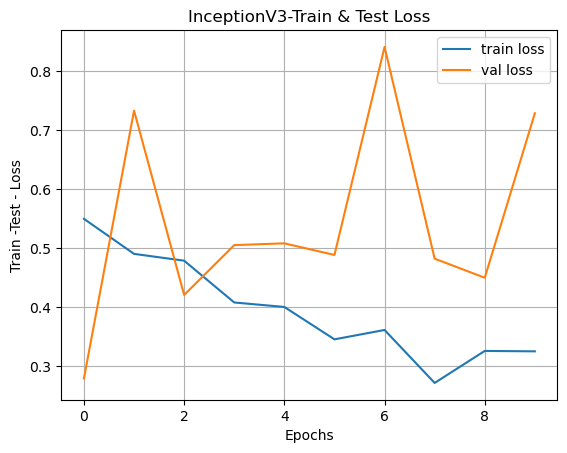

<Figure size 640x480 with 0 Axes>

In [14]:
plt.title('InceptionV3-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('InceptionV3--LossVal_loss')

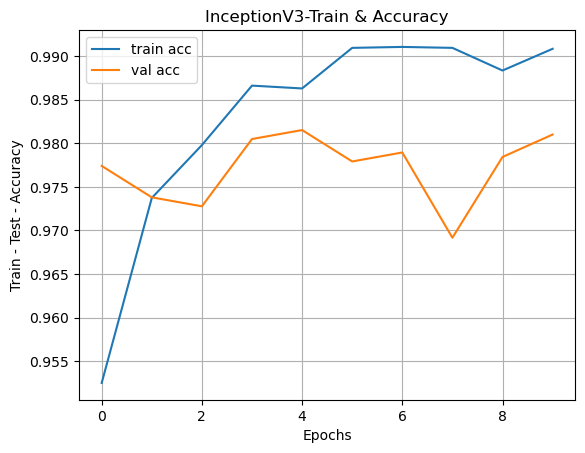

<Figure size 640x480 with 0 Axes>

In [38]:
plt.title('InceptionV3-Train & Accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train - Test - Accuracy')
plt.grid()
plt.show()
plt.savefig('InceptionV3 AccVal_acc')

In [16]:
import tensorflow as tf
from keras.models import load_model
model.save('InceptionV3model.h5')

C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

batch_size = 5
num_samples = len(test_set.classes)
steps = num_samples // batch_size
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['buildings', 'sea', 'mountain', 'forest']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


C:\Users\Sravan Kumar\AppData\Local\Temp\ipykernel_708\2503761539.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
[[ 92 114 108 123]
 [118 110 119 127]
 [116 118 155 136]
 [132 127 125 126]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.20      0.21      0.21       437
         sea       0.23      0.23      0.23       474
    mountain       0.31      0.30      0.30       525
      forest       0.25      0.25      0.25       510

    accuracy                           0.25      1946
   macro avg       0.25      0.25      0.25      1946
weighted avg       0.25      0.25      0.25      1946



<Axes: >

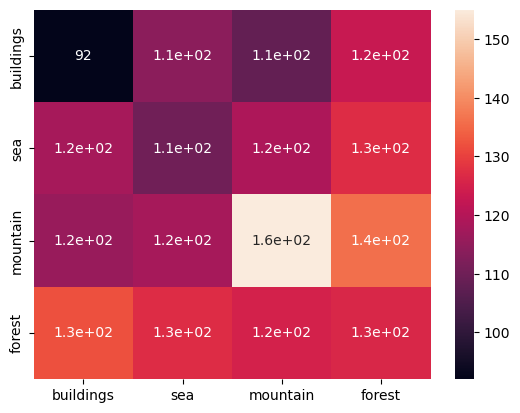

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['buildings','sea','mountain','forest'],
            yticklabels=['buildings','sea','mountain','forest'])

In [24]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications import MobileNet
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in mobilenet.layers:
    layer.trainable = False

17225924/17225924 [==============================] - 5s 0us/step


In [26]:
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [27]:
model = Model(inputs=mobilenet.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [28]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Training length:\n')
training_set = train_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_train/seg_train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
print('=' * 100)

print('Test length:\n')
test_set = test_datagen.flow_from_directory(
    'C:/Users/Sravan Kumar/Downloads/Multiclass Dataset/seg_test/seg_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Training length:

Found 9248 images belonging to 4 classes.
Test length:

Found 1946 images belonging to 4 classes.


In [30]:
model.compile(
 loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)

In [31]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set))

Epoch 1/10
289/289 [==============================] - 282s 966ms/step - loss: 0.4820 - accuracy: 0.9525 - val_loss: 0.3167 - val_accuracy: 0.9774
Epoch 2/10
289/289 [==============================] - 283s 978ms/step - loss: 0.4440 - accuracy: 0.9737 - val_loss: 0.4706 - val_accuracy: 0.9738
Epoch 3/10
289/289 [==============================] - 276s 956ms/step - loss: 0.4077 - accuracy: 0.9798 - val_loss: 0.6862 - val_accuracy: 0.9728
Epoch 4/10
289/289 [==============================] - 284s 982ms/step - loss: 0.2894 - accuracy: 0.9866 - val_loss: 0.4298 - val_accuracy: 0.9805
Epoch 5/10
289/289 [==============================] - 262s 906ms/step - loss: 0.3027 - accuracy: 0.9863 - val_loss: 0.4544 - val_accuracy: 0.9815
Epoch 6/10
289/289 [==============================] - 261s 903ms/step - loss: 0.1826 - accuracy: 0.9909 - val_loss: 0.6365 - val_accuracy: 0.9779
Epoch 7/10
289/289 [==============================] - 257s 889ms/step - loss: 0.1582 - accuracy: 0.9910 - val_loss: 0.5864 -

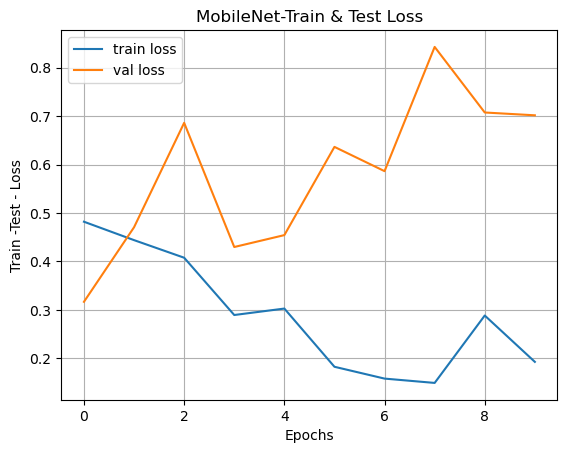

<Figure size 640x480 with 0 Axes>

In [32]:
plt.title('MobileNet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('MobileNet--LossVal_loss')

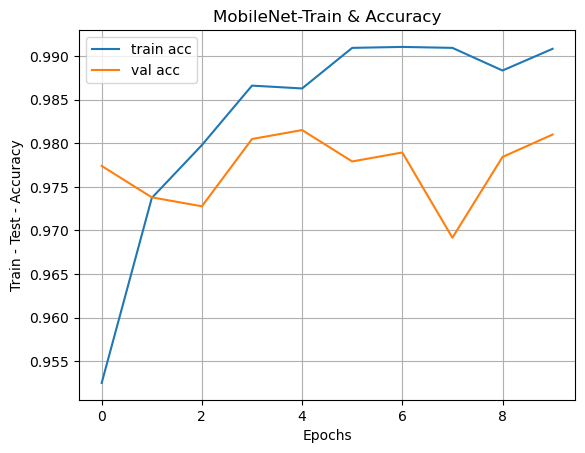

<Figure size 640x480 with 0 Axes>

In [33]:
plt.title('MobileNet-Train & Accuracy')
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Train - Test - Accuracy')
plt.grid()
plt.show()
plt.savefig('MobileNet AccVal_acc')

In [34]:
import tensorflow as tf
from keras.models import load_model
model.save('MobileNetmodel.h5')

C:\Users\Sravan Kumar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

batch_size = 5
num_samples = len(test_set.classes)
steps = num_samples // batch_size
Y_pred = model.predict_generator(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['buildings', 'sea', 'mountain', 'forest']
print(classification_report(test_set.classes, y_pred, target_names=target_names))


C:\Users\Sravan Kumar\AppData\Local\Temp\ipykernel_708\681770456.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set)


Confusion Matrix
[[ 95  94 131 117]
 [111 125 107 131]
 [129 125 142 129]
 [102 136 148 124]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.22      0.22      0.22       437
         sea       0.26      0.26      0.26       474
    mountain       0.27      0.27      0.27       525
      forest       0.25      0.24      0.25       510

    accuracy                           0.25      1946
   macro avg       0.25      0.25      0.25      1946
weighted avg       0.25      0.25      0.25      1946



<Axes: >

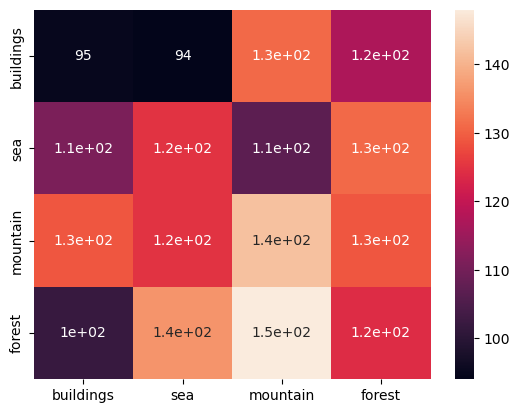

In [37]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['buildings','sea','mountain','forest'],
            yticklabels=['buildings','sea','mountain','forest'])